In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/hellraizer/fastai/courses/ml1/')

In [3]:
from fastai.imports import *
from fastai.structured import *

In [109]:
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [6]:
customers = pd.read_excel('Dataset.xlsx',
sheetname=0,
header=0,
index_col=False,
keep_default_na=True
)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/util/_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


In [7]:
df_raw = customers.copy()

In [8]:
customers.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'ClaimSize'],
      dtype='object')

In [9]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000): 
        with pd.option_context("display.max_columns", 50): 
            display(df)

In [10]:
display_all(customers.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [11]:
train_cats(df_raw)

In [12]:
df_raw.Month.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], ordered=True, inplace=True)

In [13]:
df_raw.DayOfWeek.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                ordered=True, inplace=True)

In [14]:
df_raw.DayOfWeekClaimed.cat.set_categories(['Monday', 'Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday',
                                            'Sunday'], ordered=True, inplace=True)

In [15]:
df_raw.MonthClaimed.cat.set_categories(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], ordered=True, inplace=True)

In [61]:
# df_raw['MonthClaimed'][df_raw['MonthClaimed']== 0]
df_raw.drop(df_raw[df_raw['MonthClaimed'].isna()])

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
1146,Jul,2,Monday,Honda,Rural,NaN,NaN,1,Male,Single,...,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,70530.646951


In [16]:
df, y, nas = proc_df(df_raw, 'FraudFound_P')

In [17]:
display_all(df.head())

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize,Age_na,DriverRating_na
0,12,5,3,7,2,2,1,1,1,3,21.0,1,6,2,6,1,12,300,1.0,4,3,4,2,4,1,1,1,4,1,3,1994,3,55526.069421,False,False
1,1,3,3,7,2,1,1,4,2,3,34.0,1,5,2,6,2,15,400,4.0,4,3,4,5,5,2,1,1,4,4,1,1994,2,59294.455571,False,False
2,10,5,5,7,2,4,11,2,2,2,47.0,1,5,2,6,3,7,400,3.0,4,3,1,6,7,1,1,1,4,4,1,1994,2,71756.941320,False,False
3,6,2,6,18,1,5,7,1,2,2,65.0,2,3,2,1,4,4,400,2.0,4,3,1,7,8,2,1,1,3,4,1,1994,3,7584.153493,False,False
4,2,1,6,7,2,1,2,3,2,2,36.0,2,5,2,6,7,14,400,1.0,4,3,1,6,6,1,1,1,1,4,1,1994,2,98545.374339,False,False


In [18]:
m = RandomForestClassifier()

In [19]:
m.fit(df, y)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
m.score(df, y)

0.9915261565067013

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(df, y, random_state = 0, test_size=0.32)

In [22]:
X_train.shape, X_valid.shape

((7864, 35), (3701, 35))

In [198]:
def error(x,y):
    print(confusion_matrix(x, y))
    print(f1_score(x, y))
    print(classification_report(x, y))
    
def print_score(m):
    res = [error(m.predict(X_train), y_train),
           error(m.predict(X_valid), y_valid),
           m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
#     print(res[2:])

In [200]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_train, y_train)
print_score(m)

[[7364  109]
 [  23  368]]
0.8479262672811061
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7473
           1       0.77      0.94      0.85       391

   micro avg       0.98      0.98      0.98      7864
   macro avg       0.88      0.96      0.92      7864
weighted avg       0.99      0.98      0.98      7864

[[3395  177]
 [  98   31]]
0.18397626112759646
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      3572
           1       0.15      0.24      0.18       129

   micro avg       0.93      0.93      0.93      3701
   macro avg       0.56      0.60      0.57      3701
weighted avg       0.94      0.93      0.93      3701



In [26]:
fi = rf_feat_importance(m, df); fi[:10]

,cols,imp
15,PolicyNumber,0.140968
11,Fault,0.133881
31,BasePolicy,0.080526
32,ClaimSize,0.076441
12,PolicyType,0.070196
10,Age,0.061583
0,Month,0.051829
16,RepNumber,0.044211
6,MonthClaimed,0.036367
28,AddressChange_Claim,0.033565


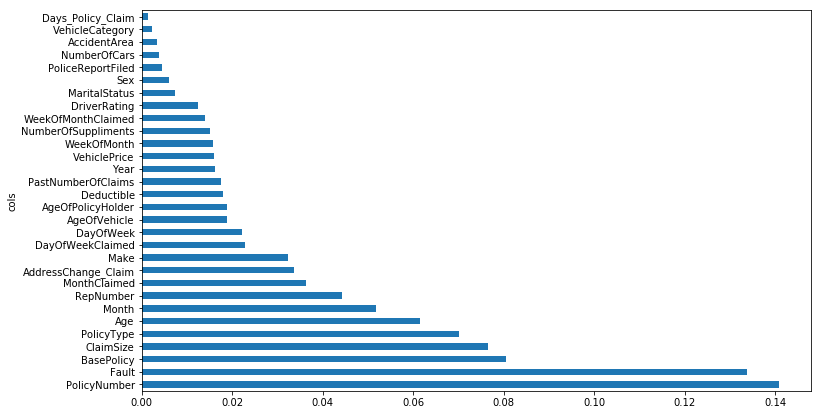

In [27]:
def plot_fi(fi): 
    return fi.plot('cols','imp','barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [28]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)
m.fit(X_train.drop('PolicyNumber', axis=1), y_train)
res = [error(m.predict(X_train.drop('PolicyNumber', axis=1)), y_train),
           error(m.predict(X_valid.drop('PolicyNumber', axis=1)), y_valid),
           m.score(X_train.drop('PolicyNumber', axis=1), y_train), m.score(X_valid.drop('PolicyNumber', axis=1), y_valid)]
print(res)

[[7359  100]
 [  28  377]]
0.8548752834467122
[[3398  180]
 [  95   28]]
0.16918429003021146
[None, None, 0.9837232960325534, 0.9256957579032694]


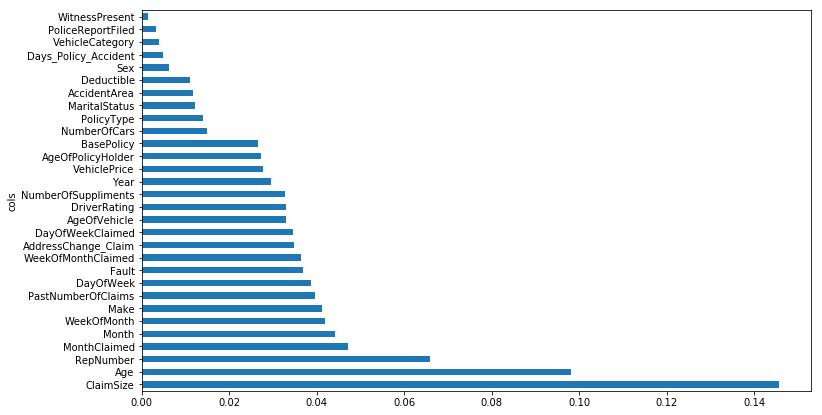

In [189]:
fi = rf_feat_importance(m, df.drop('PolicyNumber', axis=1))
plot_fi(fi[:30]);

In [160]:
m = RandomForestClassifier(n_estimators=1, n_jobs=-1, max_depth=3)
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

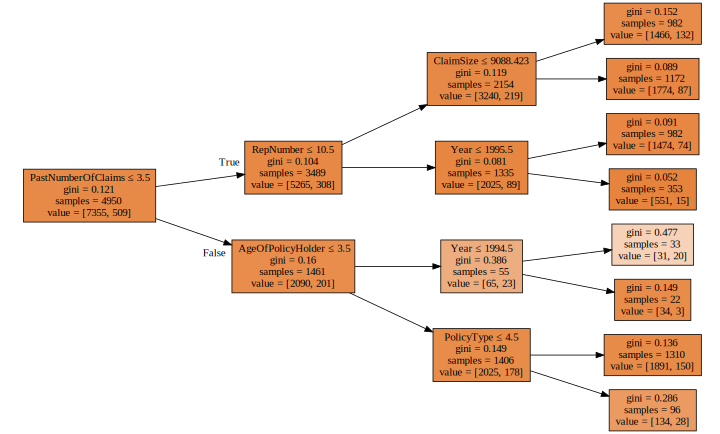

In [161]:
draw_tree(m.estimators_[0], X_valid, precision=3)

In [201]:
import lightgbm as lgb
print("LightGBM version: {}".format(lgb.__version__))

LightGBM version: 2.2.2


In [375]:
lgb_train = lgb.Dataset(X_res, y_res, free_raw_data=False)
lgb_test = lgb.Dataset(X_valid, y_valid, reference=lgb_train, free_raw_data=False)

In [411]:
parameters = {'num_leaves': 2**5,
              'learning_rate': 0.05,
              'is_unbalance': True,
              'min_split_gain': 0.03,
              'min_child_weight': 1,
              'reg_lambda': 1,
              'subsample': 1,
              'objective':'binary',
              #'device': 'gpu', # comment this line if you are not using GPU
              'task': 'train'
              }
num_rounds = 500

In [412]:
%%time
clf = lgb.train(parameters, lgb_train, num_boost_round=num_rounds)

CPU times: user 1.32 s, sys: 0 ns, total: 1.32 s
Wall time: 170 ms


In [413]:
y_prob = clf.predict(X_valid)

y_pred = np.array([0 if i<0.5 else 1 for i in y_prob])

error(y_pred, y_valid)

[[2730   20]
 [ 763  188]]
0.32441760138050046
              precision    recall  f1-score   support

           0       0.78      0.99      0.87      2750
           1       0.90      0.20      0.32       951

   micro avg       0.79      0.79      0.79      3701
   macro avg       0.84      0.60      0.60      3701
weighted avg       0.81      0.79      0.73      3701



In [29]:
from sklearn.svm import OneClassSVM

In [111]:
m = OneClassSVM(gamma='scale', degree=3, kernel='rbf')
m.fit(X_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, random_state=None, shrinking=True, tol=0.001,
      verbose=False)

In [112]:
y_prob = m.predict(X_valid)

y_prob[y_prob == -1].sum()

y_pred = np.array([0 if i==-1 else 1 for i in y_prob])

error(y_pred, y_valid)



[[2235  125]
 [1258   83]]
0.10716591349257587


In [146]:
m = IsolationForest(behaviour='new', n_jobs=-1, n_estimators=100, max_features=0.5, bootstrap=True)
m.fit(X_train)

y_prob = m.predict(X_valid)

y_prob[y_prob == 1].sum()

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


IsolationForest(behaviour='new', bootstrap=True, contamination='legacy',
        max_features=0.5, max_samples='auto', n_estimators=100, n_jobs=-1,
        random_state=None, verbose=0)

In [151]:
from sklearn.neighbors import LocalOutlierFactor

In [196]:
m = LocalOutlierFactor(novelty=True, n_neighbors=30, algorithm='ball_tree', leaf_size=40, p=5)
m.fit(X_train)

/home/hellraizer/miniconda3/envs/fastai/lib/python3.6/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)


LocalOutlierFactor(algorithm='ball_tree', contamination='legacy',
          leaf_size=40, metric='minkowski', metric_params=None,
          n_jobs=None, n_neighbors=30, novelty=True, p=5)

In [197]:
y_prob = m.predict(X_valid)

y_pred = np.array([1 if i==-1 else 0 for i in y_prob])

error(y_pred, y_valid)

[[3130  189]
 [ 363   19]]
0.06440677966101695


In [352]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [414]:
rus = RandomOverSampler(random_state=42)

In [415]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [438]:
y_res[y_res == 1].sum()

7387

In [416]:
m = RandomForestClassifier(n_estimators=3, n_jobs=-1, max_features=0.5)

m.fit(X_res, y_res)
print_score(m)

[[7348    0]
 [  39  477]]
0.9607250755287009
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7348
           1       1.00      0.92      0.96       516

   micro avg       1.00      1.00      1.00      7864
   macro avg       1.00      0.96      0.98      7864
weighted avg       1.00      1.00      0.99      7864

[[3364  166]
 [ 129   42]]
0.22163588390501318
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      3530
           1       0.20      0.25      0.22       171

   micro avg       0.92      0.92      0.92      3701
   macro avg       0.58      0.60      0.59      3701
weighted avg       0.93      0.92      0.92      3701

